In [1]:
import os

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import tensorflow as tf

if os.getcwd().split(os.sep)[-1] == 'notebook':
    os.chdir('..')

from cma import CMA
from notebook.utils import (
    plot_3d_surface,
    plot_2d_contour,
    plot_generations,
    draw_confidence_ellipse,
    plot_mean_coordinates,
)

In [2]:
tf.random.set_seed(12345)  # set random seed for reproducibility

# Optimisation of the Schwefel Function

In [3]:
def fitness_fn(x):
    """
    Schwefel Function
    https://www.sfu.ca/~ssurjano/schwef.html
    """
    dimension = tf.cast(tf.shape(x)[1], tf.float64)
    return 418.9829 * dimension - tf.reduce_sum(x * tf.sin(tf.sqrt(tf.abs(x))), axis=1)

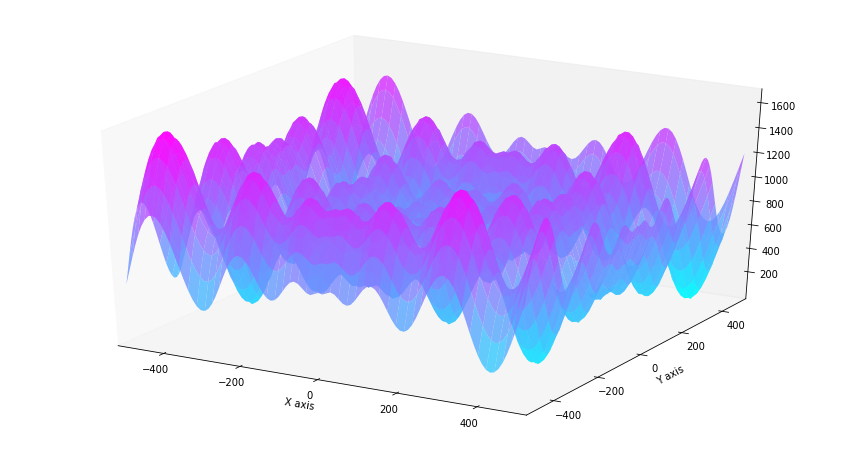

In [4]:
xlim, ylim = [-500, 500], [-500, 500]

plot_3d_surface(fitness_fn, xlim, ylim);

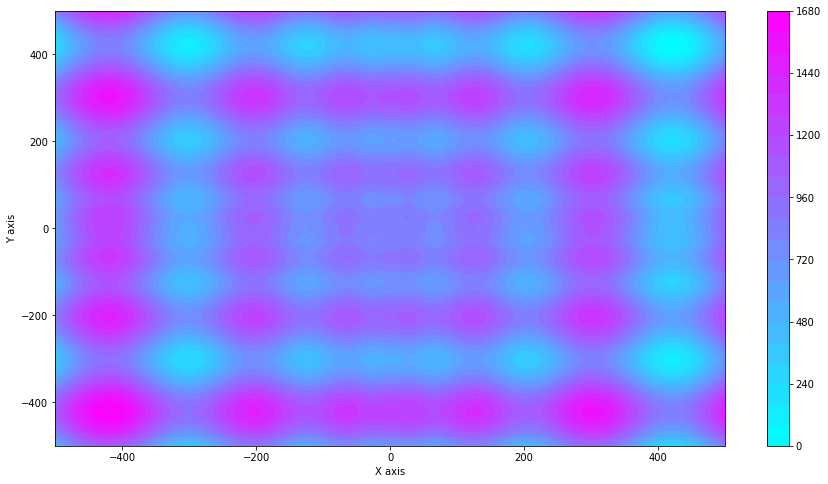

In [5]:
plot_2d_contour(fitness_fn, xlim, ylim);

In [6]:
%%time
cma = CMA(
    initial_solution=[0., 0.],
    initial_step_size=1000.0,
    fitness_function=fitness_fn,
    store_trace=True,
    # Ensure that the fitness function is never called 
    # outisde the specified bounds:
    enforce_bounds=[xlim, ylim],
);
cma.search();

num_generations = cma.generation
best_solution = cma.best_solution()
best_fitness = cma.best_fitness()

print('Number of generations:', num_generations)
print(f'Best solution: [{best_solution[0]:.5f}, {best_solution[1]:.5f}]')
print(f'Best fitness: {best_fitness:.4f}')
print()

Number of generations: 60
Best solution: [-302.52494, -302.52495]
Best fitness: 236.8767

CPU times: user 1.13 s, sys: 12.8 ms, total: 1.14 s
Wall time: 1.15 s


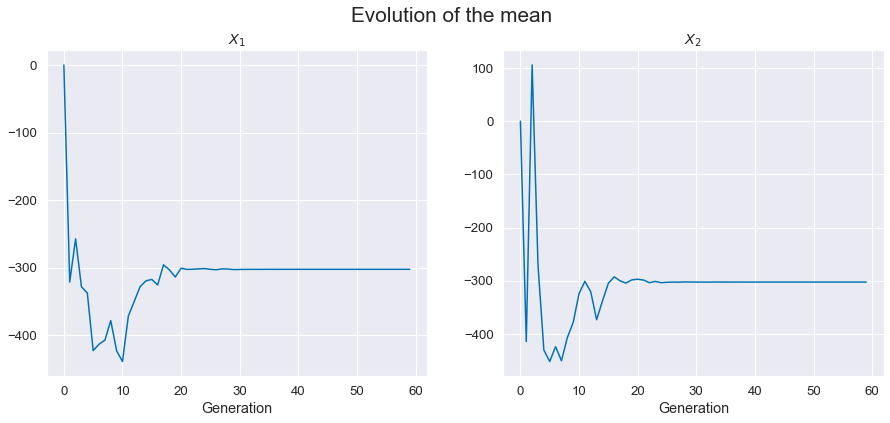

In [7]:
sns.set(palette='colorblind', font_scale=1.2)  # better default style for matplotlib
plot_mean_coordinates(cma.trace);

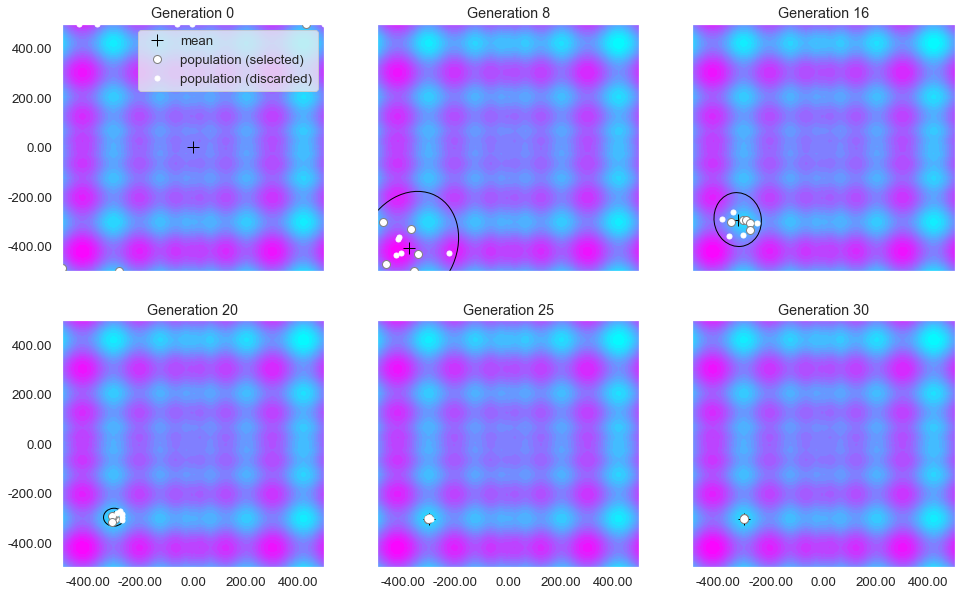

In [9]:
generations = [0, 8, 16, 20, 25, 30]
fig, _ = plot_generations(
    generations,
    cma.trace,
    fitness_fn,
    xlim=xlim, 
    ylim=ylim,
);

## Discussion

The search settled for one of the 3 "best local minima" (top left corner, bottom corners), but failed to reach the global minimum (top right corner). That's expected as CMA-ES does not guarantee that the global minimum will be reached. 

In practice, finding the global minimum is rarely possible and often not useful. The fact that it founds one of the 4 best solutions is a good sign.